In [62]:
using Pkg
Pkg.activate("../..")
# Pkg.instantiate()

  Activating project at `c:\Simulations\EpistemicMessagePassing`


In [63]:
using LinearAlgebra
using Plots

da = 0.05
as = 0:da:1
n = length(as)

function pdf(f, s, b)
    fA = zeros(n,n)
    for j = 1:n
        for k = 1:n
            A_jk = [as[j] as[k]; 1-as[j] 1-as[k]]
            fA[j,k] = f(A_jk, s, b)
        end
    end
    
    return fA ./ sum(fA)
end;

In [79]:
# Parameters
s = [0.9, 0.1]
b = [2.0, 2.0];

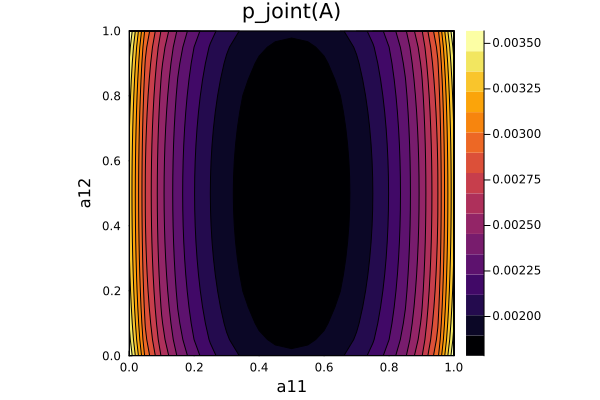

In [80]:
# Joint Distribution
f_joint(A, s, b) = exp.(s'*diag(A'*log.(A .+ eps())) + (A*s)'*b)
pdf_joint = pdf(f_joint, s, b)

plt = plot(as,
           as,
           pdf_joint',
           st=:contour,
           fill=true,
           dpi=100,
           aspect_ratio=:equal, 
           xlim=(0,1), 
           ylim=(0,1), 
           xlabel="a11",
           ylabel="a12",
           title="p_joint(A)")

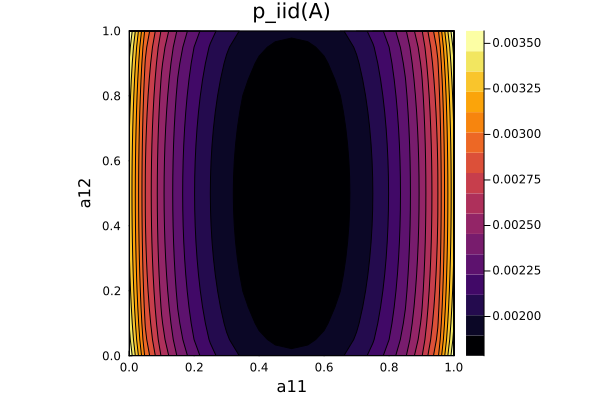

In [81]:
# IID Distribution
f_iid(A, s, b) = exp.(s[1]*A[:,1]'*log.(A[:,1].+eps()) + s[1]*A[:,1]'*b + s[2]*A[:,2]'*log.(A[:,2].+eps()) + s[2]*A[:,2]'*b)
pdf_iid = pdf(f_iid, s, b)

plt = plot(as,
           as,
           pdf_iid',
           st=:contour,
           fill=true,
           dpi=100,
           aspect_ratio=:equal, 
           xlim=(0,1), 
           ylim=(0,1), 
           xlabel="a11",
           ylabel="a12",
           title="p_iid(A)")